In [106]:
# Predict Heart Disease based on the features 

In [10]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data
data=pd.read_csv('C:/Users/shwer/data/dataset.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Understanding the data 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# to check null values in data
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 0, 'Sex (0 = female, 1= male)')

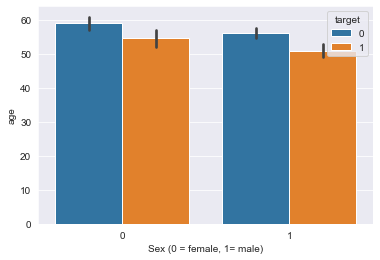

In [84]:
sns.barplot(x='sex',y='age',hue='target',data=data)
plt.xlabel("Sex (0 = female, 1= male)")

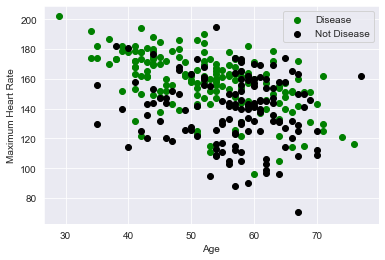

In [85]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Text(0.5, 1.0, 'Variation of Age for each target class')

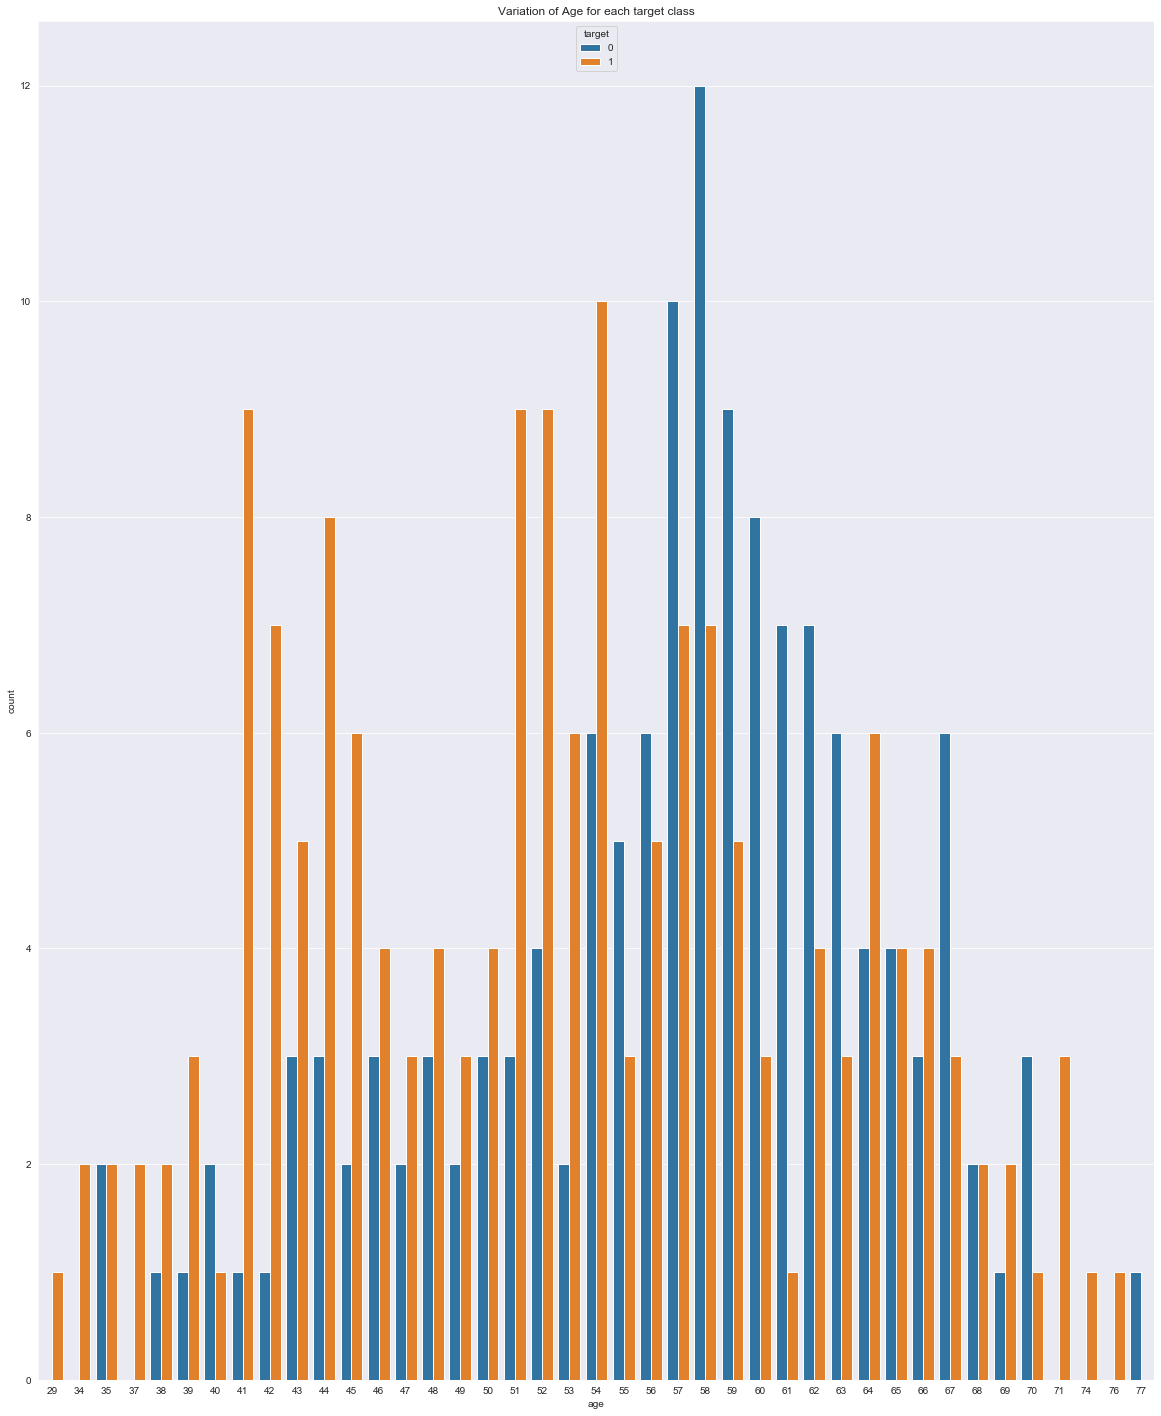

In [24]:
plt.figure(figsize=(20,25))
sns.countplot(x='age',hue='target',data=data)
plt.title('Variation of Age for each target class')

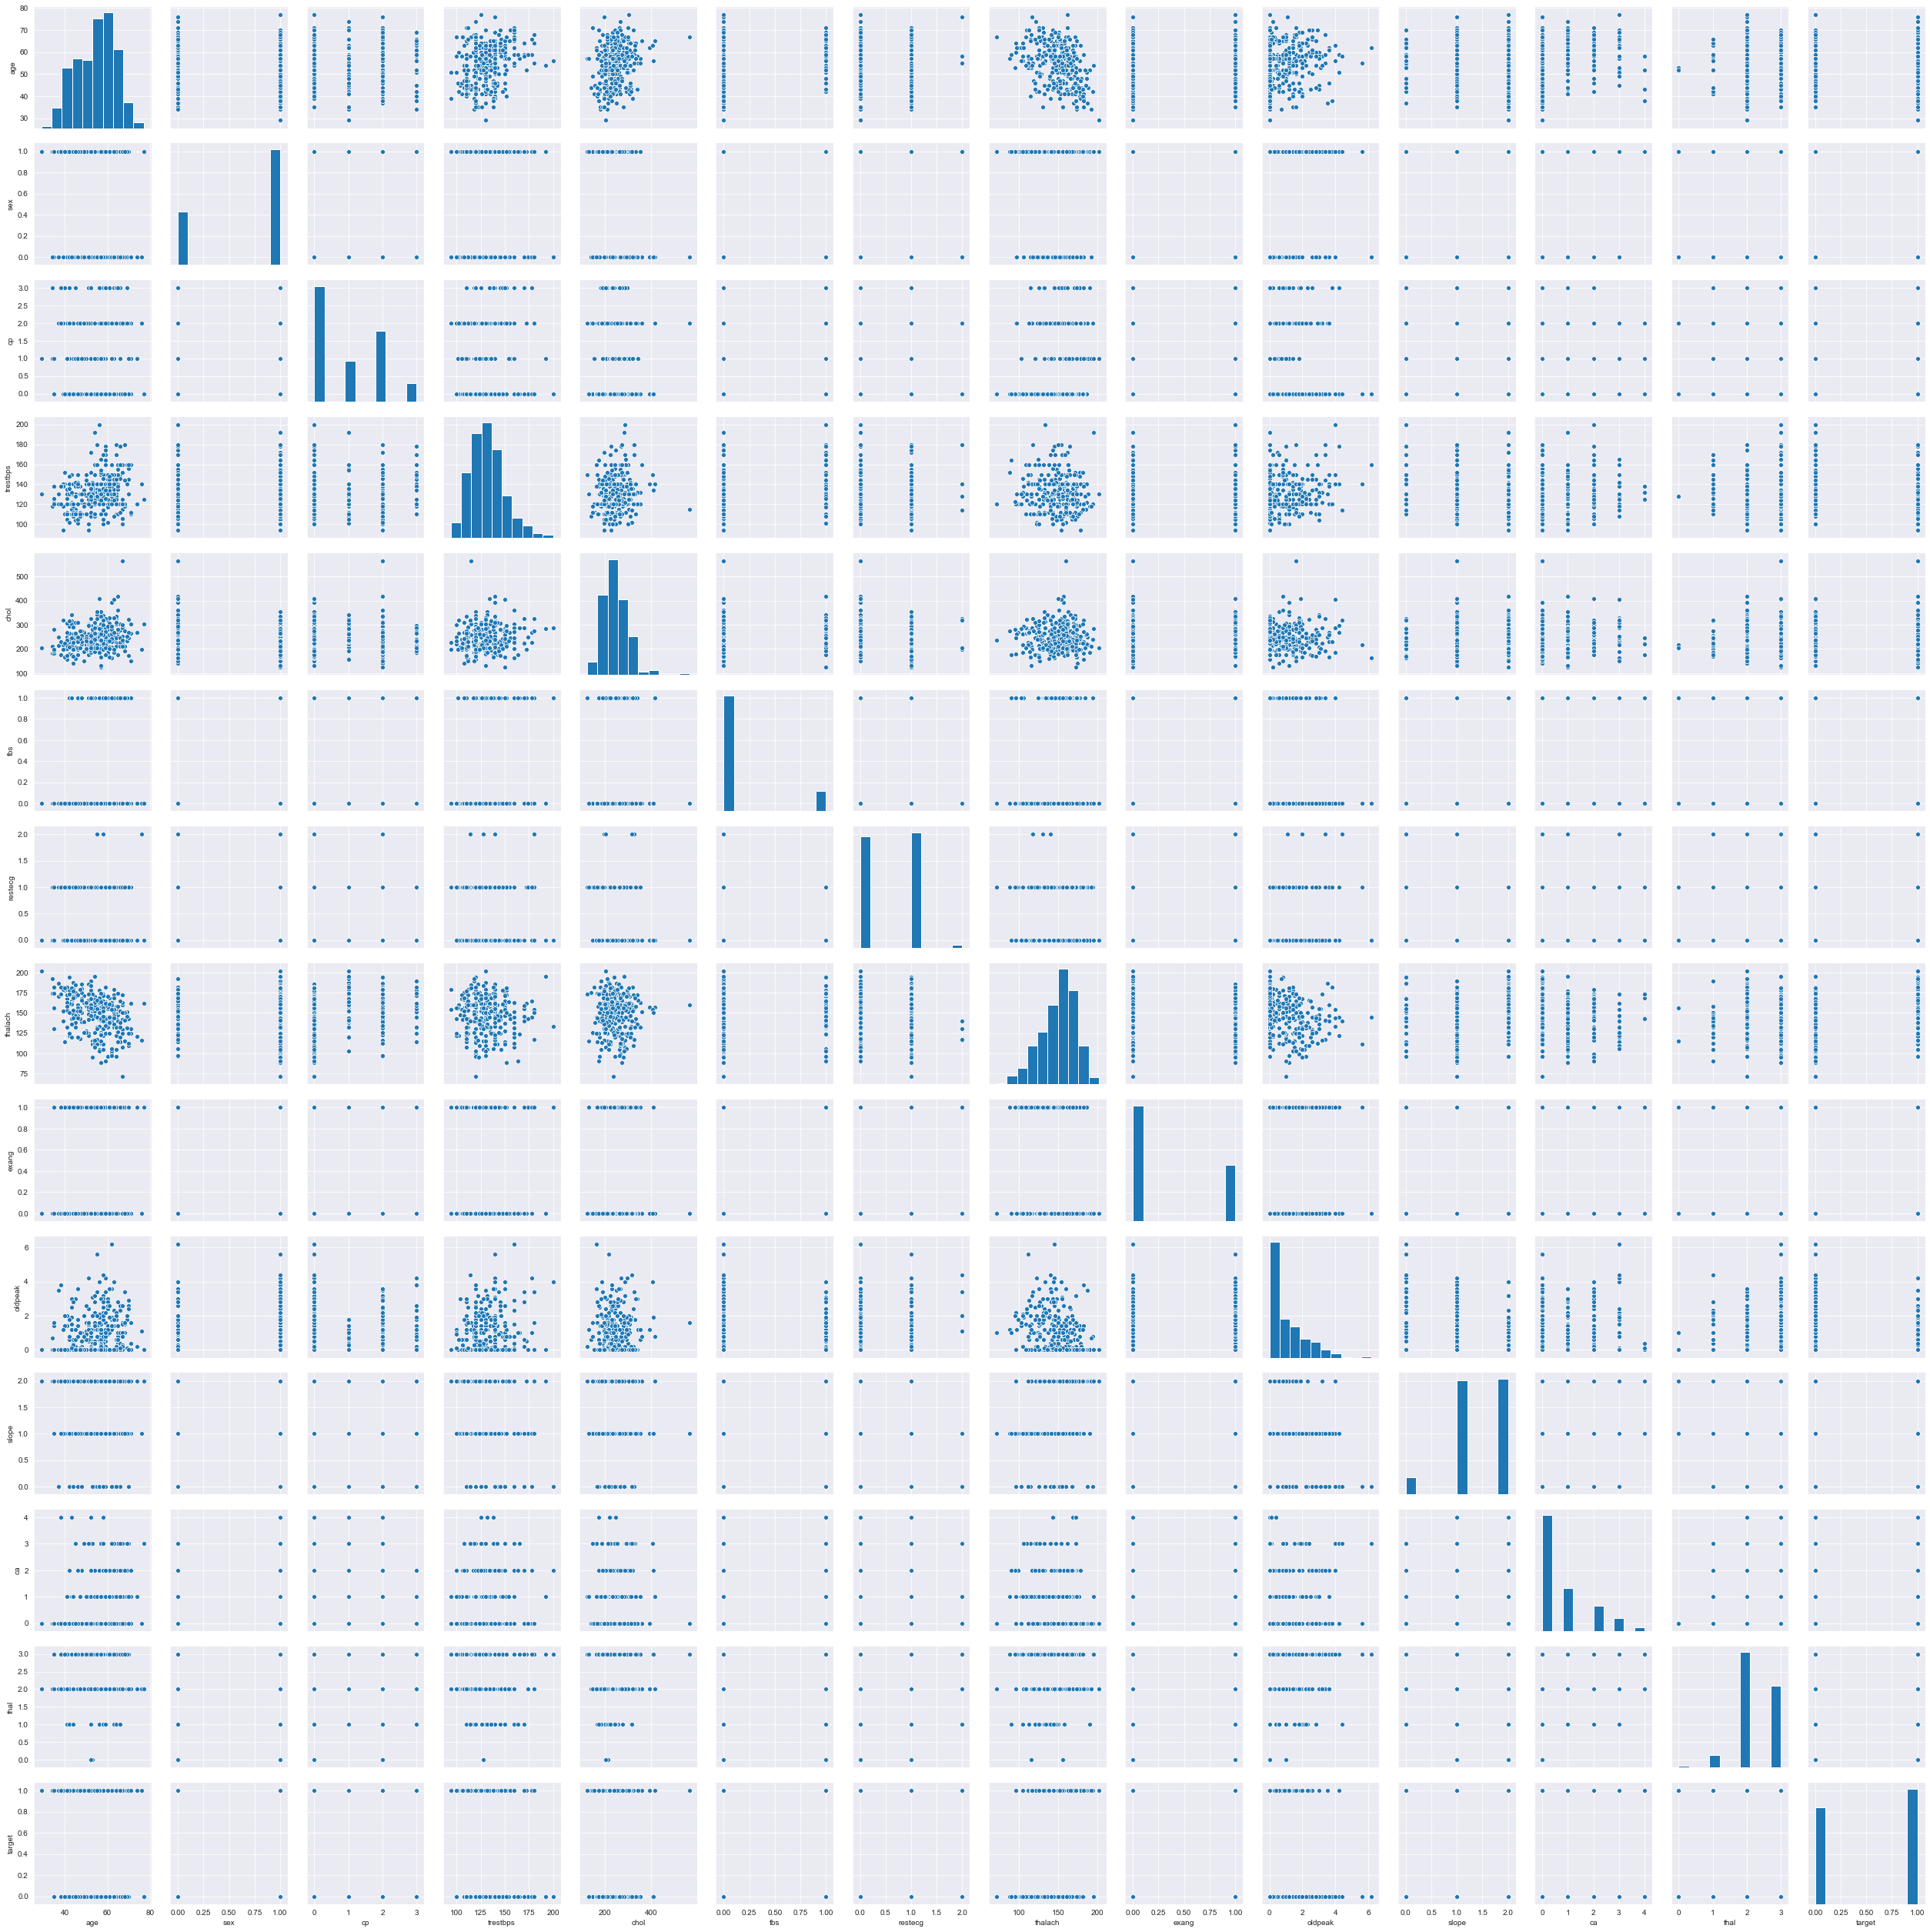

In [25]:
# to find relationship and correlations between different features
sns.pairplot(data)

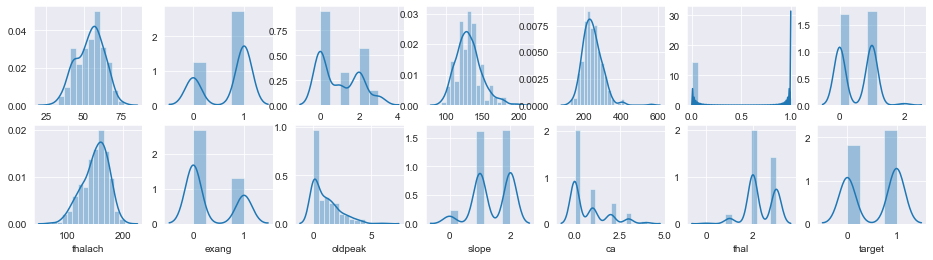

In [26]:
# to see distribution plot
rows=2
cols=7
fig,ax= plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))

col=data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1
        

In [29]:
# to see correlation

In [30]:
corrmat=data.corr()

In [31]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


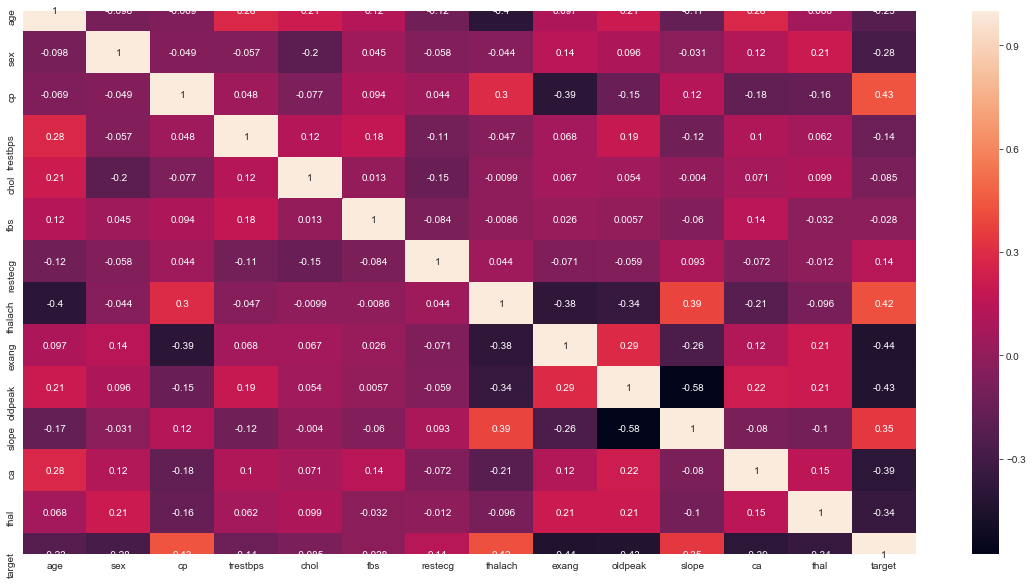

In [33]:

# plot correlation matrix
fig, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, annot=True)

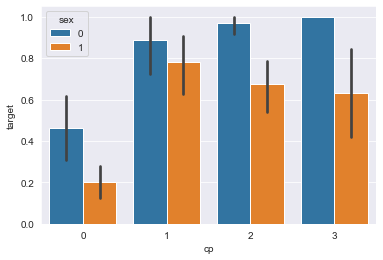

In [35]:
sns.barplot(x='cp',y='target',hue='sex',data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF6C44FB48>,
      dtype=object)

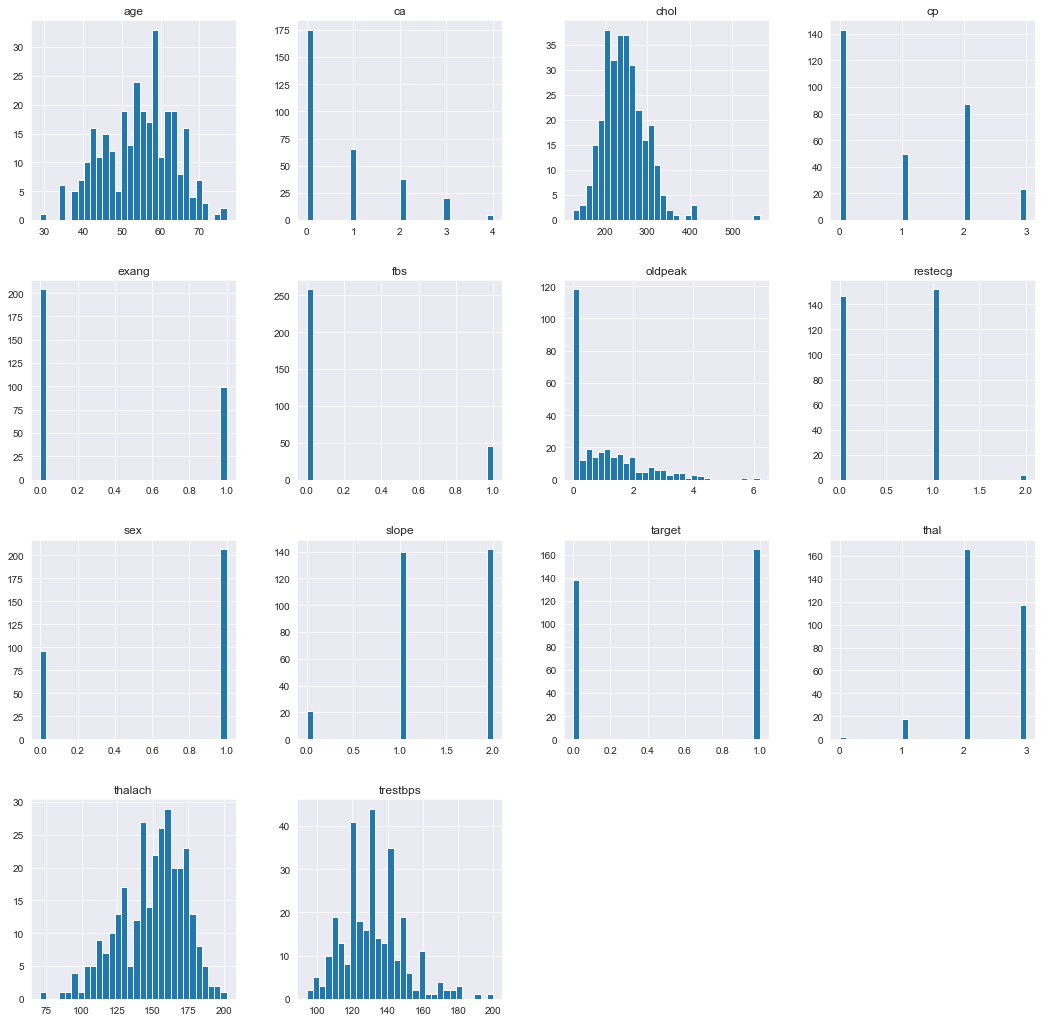

In [73]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
data.hist(ax=ax,bins=30)


In [37]:
data['target'].value_counts() # to check whether target column is balanced or not

1    165
0    138
Name: target, dtype: int64

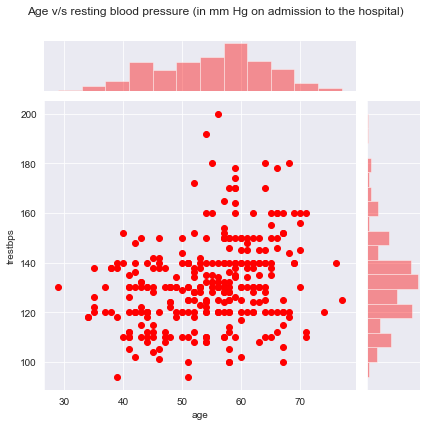

In [70]:
g=sns.jointplot(x="age", y="trestbps", data=data, color="r")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s resting blood pressure (in mm Hg on admission to the hospital)') 
plt.show()

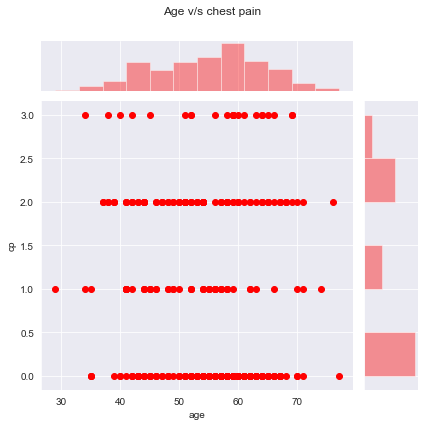

In [71]:
g=sns.jointplot(x="age", y="cp", data=data, color="r")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s chest pain') 
plt.show()

In [38]:
# Converting categorical variables into dummy variables
dataset=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [39]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [40]:
# scaling features

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=sc.fit_transform(dataset[columns_to_scale])

In [42]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
X=dataset.drop(['target'],axis=1)
y=dataset['target']

In [44]:
# Training Test Splitting data

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
# find K value i.e. neigbor value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [47]:
# Plot K Value and Accuracy Rate

Text(0, 0.5, 'AccuracyRate')

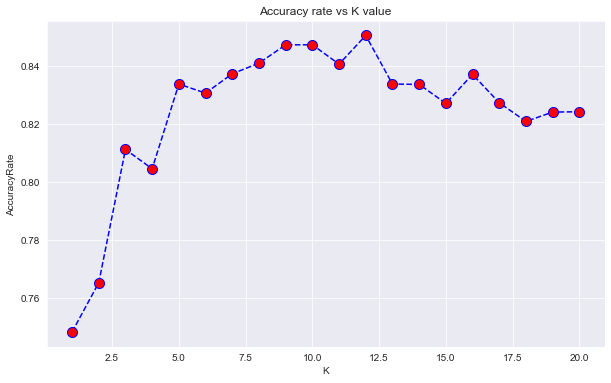

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Accuracy rate vs K value")
plt.xlabel('K')
plt.ylabel("AccuracyRate")

In [49]:
# find K value i.e. neigbor value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
error_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'ErrorRate')

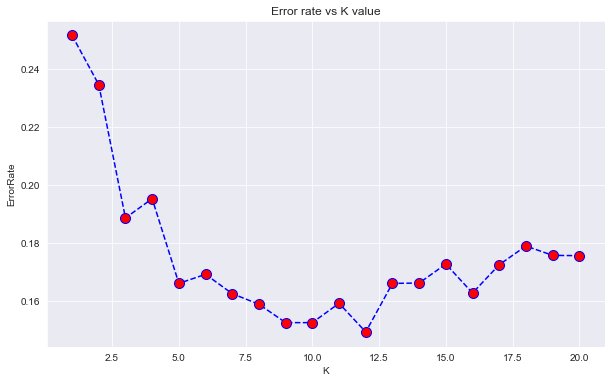

In [50]:
# Plot K value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel("ErrorRate")

In [51]:
# K =11 we see constant error rate or accuracy rate Choose K=11

In [52]:
# Using KNeigborsClassifier model 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [56]:
# Getting of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

In [57]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classfier=RandomForestClassifier(n_estimators=10)
classfier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred=classfier.predict(X_test)

In [59]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[23,  4],
       [ 8, 26]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8032786885245902

In [61]:
# trying DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
y_pred1=classifier.predict(X_test)

In [63]:
cm=confusion_matrix(y_test,y_pred1)
cm


array([[21,  6],
       [ 8, 26]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8032786885245902

In [65]:
# Accuracy score is good for KNeigborsClassifier so we select that model

In [86]:
# Support Vector Machine
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8032786885245902

In [89]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[21,  6],
       [ 8, 26]], dtype=int64)

In [90]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
y_pred=classfier.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8032786885245902

In [93]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[21,  6],
       [ 8, 26]], dtype=int64)

In [98]:
# accuracy of KNN model is good and also gives less incorrect predictions compared to other ML models